In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import math
import os
import os.path as osp
from tqdm.auto import tqdm
from analysis.plot_matplotlib import plot_hist
#module_reload('analysis')
from analysis.mem_ana import load_results, parse_line_to_float
from analysis.utils import module_reload
from analysis.plot_matplotlib import plot_hist

In [7]:
src_path = "/nfs/dust/ilc/user/bliewert/mem_integrate/results"
event_idx = 7336
file_path = f"{src_path}/event_{str(event_idx)}/result.txt"

In [78]:
keys = ['zhh', 'zzh']
result = {
    
}
for key in keys:
    result[f'res_{key}'] = []
    result[f'sigma_{key}'] = []

with open(file_path, 'r') as file:
    Lines = file.readlines()
    
    for line in tqdm(Lines):
        for key in keys:
            if line.startswith(key.upper()):
                res, uncert = parse_line_to_float(line)
                
                result[f'res_{key}'].append(res)
                result[f'sigma_{key}'].append(uncert)
        
df = pd.DataFrame(result)

100%|██████████| 767/767 [00:00<00:00, 177071.29it/s]


In [89]:
np.average(df['res_zhh']), np.average(df['res_zzh'])

(2.1327890625e-07, 6.65655859375e-09)

In [88]:
np.average(df['sigma_zhh']), np.average(df['sigma_zzh'])

(2.0640625000000002e-08, 4.5980468749999995e-10)

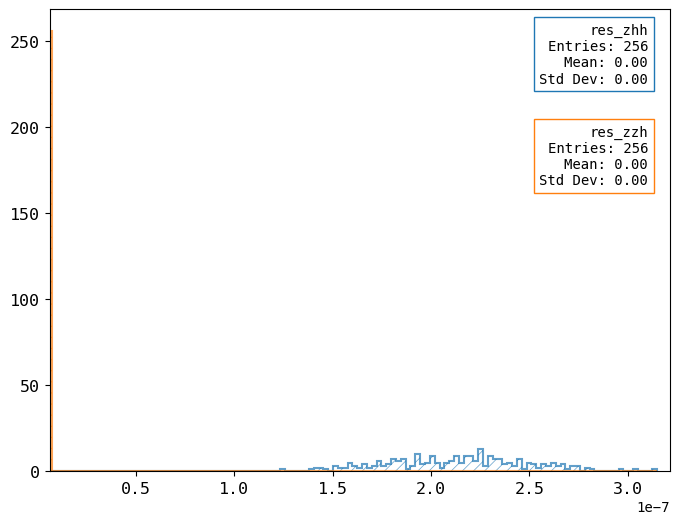

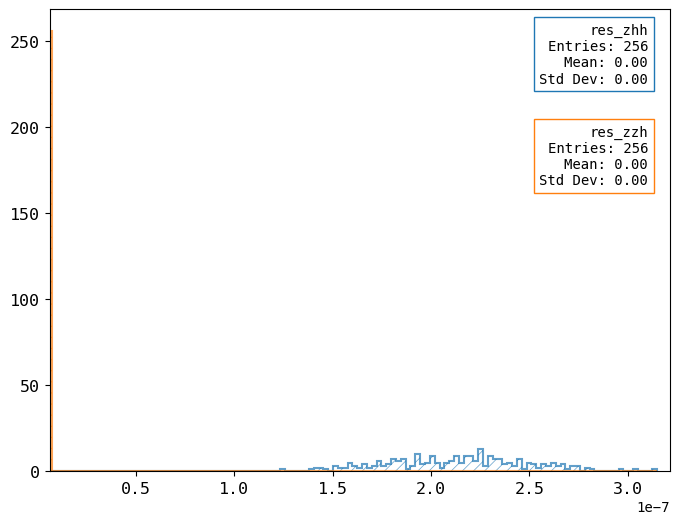

In [84]:
plot_hist(df, x=['res_zhh', 'res_zzh'])

In [ ]:
np.random.seed(2023)

results = load_results("/nfs/dust/ilc/user/bliewert/mem_integrate/results", reco)

print([
    np.count_nonzero(results["zhh_mem"] > results["zzh_mem"]),
    np.count_nonzero(results["zhh_mem"] < results["zzh_mem"])
], "nMEM(Sig > Bkg), nMEM(Sig < Bkg)")
print([
    np.count_nonzero(results["is_zhh"]),
    np.count_nonzero(results["is_zzh"])
], "nSig : nBkg")